In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


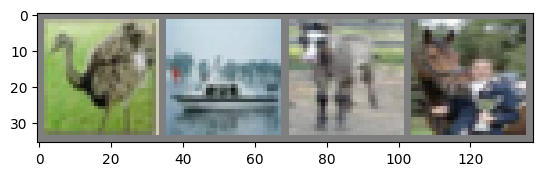

bird  ship  horse horse


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.167
[1,  4000] loss: 1.840
[1,  6000] loss: 1.651
[1,  8000] loss: 1.544
[1, 10000] loss: 1.498
[1, 12000] loss: 1.457
[2,  2000] loss: 1.370
[2,  4000] loss: 1.365
[2,  6000] loss: 1.339
[2,  8000] loss: 1.308
[2, 10000] loss: 1.293
[2, 12000] loss: 1.261
Finished Training


In [7]:
print(outputs[0])
print('-'*70)
print(labels[0])

tensor([ 1.0305,  3.6755, -0.5614, -1.1724,  0.5969, -1.3933, -1.7140, -1.2790,
         0.8761,  0.4712], grad_fn=<SelectBackward0>)
----------------------------------------------------------------------
tensor(1)


In [8]:
print(outputs[1])
print('-'*70)
print(labels[1])

tensor([ 0.3177, -2.8143,  1.8373,  0.7610,  2.0178,  1.2635, -0.5600,  1.4535,
        -1.0708, -2.3500], grad_fn=<SelectBackward0>)
----------------------------------------------------------------------
tensor(4)


In [9]:
print(outputs[2])
print('-'*70)
print(labels[2])

tensor([ 0.2325, -1.2903,  0.7483,  0.4973,  0.7895,  0.4440,  0.0654,  1.3288,
        -1.6923, -0.7970], grad_fn=<SelectBackward0>)
----------------------------------------------------------------------
tensor(2)


In [10]:
print(outputs[3])
print('-'*70)
print(labels[3])

tensor([-1.3459, -2.0589,  0.8127, -0.3339,  2.6282,  0.8453,  1.2679,  2.9483,
        -3.5637, -1.0479], grad_fn=<SelectBackward0>)
----------------------------------------------------------------------
tensor(4)


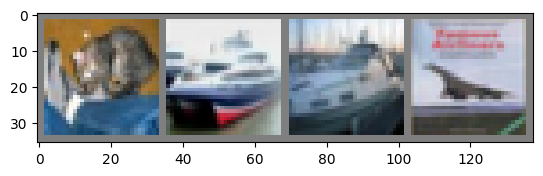

GroundTruth:  cat   ship  ship  plane


In [11]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [12]:
len(data[0][0][0][0])

32

In [13]:
len(images[0][0][0])

32

In [14]:
len(inputs[0])

3

In [15]:
inputs.shape

torch.Size([4, 3, 32, 32])

In [16]:
dataiter

In [17]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):

        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, 6, 5)

        self.pool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(6, 16, 5)

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        self.relu = nn.ReLU()

        self.flatten = nn.Flatten()

    def forward(self, x):

        print('Original:', x.shape)

        #--------------------------------------------------

        print('\n')

        x = self.conv1(x)
        print('Step 1 - Conv:', x.shape)
        x = self.relu(x)
        print('Step 1 - ReLU:', x.shape)
        x = self.pool(x)
        print('Step 1 - Max pool:', x.shape)

        #--------------------------------------------------

        print('\n')

        x = self.conv2(x)
        print('Step 2 - Conv:', x.shape)
        x = self.relu(x)
        print('Step 2 - ReLU:', x.shape)
        x = self.pool(x)
        print('Step 2 - Max pool:', x.shape)

        #--------------------------------------------------

        print('\n')

        x = self.flatten(x)
        print('Step 3 - Flatten:', x.shape)

        #--------------------------------------------------

        print('\n')

        x = self.fc1(x)
        print('Step 4 - FC:', x.shape)
        x = self.relu(x)
        print('Step 4 - ReLU:', x.shape)

        #--------------------------------------------------

        print('\n')

        x = self.fc2(x)
        print('Step 5 - FC:', x.shape)
        x = self.relu(x)
        print('Step 5 - ReLU:', x.shape)

        #--------------------------------------------------

        print('\n')

        x = self.fc3(x)
        print('Step 6 - FC:', x.shape)

        #--------------------------------------------------

        return x

net = Net()

In [18]:
out = net(inputs)

Original: torch.Size([4, 3, 32, 32])


Step 1 - Conv: torch.Size([4, 6, 28, 28])
Step 1 - ReLU: torch.Size([4, 6, 28, 28])
Step 1 - Max pool: torch.Size([4, 6, 14, 14])


Step 2 - Conv: torch.Size([4, 16, 10, 10])
Step 2 - ReLU: torch.Size([4, 16, 10, 10])
Step 2 - Max pool: torch.Size([4, 16, 5, 5])


Step 3 - Flatten: torch.Size([4, 400])


Step 4 - FC: torch.Size([4, 120])
Step 4 - ReLU: torch.Size([4, 120])


Step 5 - FC: torch.Size([4, 84])
Step 5 - ReLU: torch.Size([4, 84])


Step 6 - FC: torch.Size([4, 10])


In [19]:
for i, data in enumerate(trainloader, 0):
  print(i)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7575
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586
7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606
7607
7608
7609
7610
7611
7612
7613
7614
7615
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635
7636
7637
7638
7639
7640
7641
7642
7643
7644
7645
7646
7647
7648
7649
7650
7651
7652
7653
7654
7655
7656
7657
7658
7659
7660
7661
7662
7663
7664
7665
7666
7667
7668
7669
7670
7671
7672
7673
7674
7675
7676
7677
7678
7679
7680
7681
7682
7683
7684
7685
768

In [20]:
trainset.data.shape

(50000, 32, 32, 3)

In [21]:
import pandas as pd

In [22]:
vc_targets = pd.Series(trainset.targets).value_counts()

In [23]:
vc_targets

6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
dtype: int64

In [24]:
pv_targets = list(vc_targets.keys())
pv_targets.sort()

In [25]:
pv_targets

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]